# Laboratório 4

**Resolva todos os problemas por computação.**
<hr>

**Problema 1:** O _Índice de Massa Corpórea_ (IMC) é usado para saber se um indivíduo está no peso ideal. Ele é definido pela fórmula

$$IMC = \dfrac{M}{A^2},$$

onde $M$ é a massa (considere quilogramas) do indivíduo e $A$ é a sua altura (considere metros). Um indíviduo tem *peso normal* se seu IMC estiver no intervalo faixa $18.5 \leq IMC < 25.0$. 

A seleção brasileira masculina de futebol profissional convocada para a Copa do Mundo 2018 era composta de 23 jogadores, a saber: Alisson, Casemiro, Cássio, Danilo, Douglas Costa, Ederson, Fagner, Fernandinho, Filipe Luis, Firmino, Fred, Gabriel Jesus, Geromel, Marcelo, Marquinhos, Miranda, Neymar, Paulinho, Philippe Coutinho, Renato Augusto, Taison, Thiago Silva e Willian.

O arquivo `data/04c-copa2018.npy`, disponibilizado juntamente com este arquivo, contém uma tabela de peso, altura e idade de cada um desses atletas. 

O gráfico abaixo plota o valor do IMC para cada um desses jogadores. Todos os jogadores possuem peso ideal, mas a linha tracejada divide-os em dois grupos: 

- Grupo 1: aqueles na faixa ideal cujo IMC é menor do que 21.7.
- Grupo 2: aqueles na faixa ideal cujo IMC é maior do que 21.7.

```{figure} figs/imc.png
---
width: 800px
name: imc-selecao
---
IMC dos jogadores da seleção brasileira da Copa de 2018. [[Fonte: ESPN]](https://www.espn.com.br/artigo/_/id/4310177/selecao-brasileira-veja-o-censo-completo-dos-jogadores-que-vao-a-copa)
```
Carregue as informações do arquivo e reproduza o gráfico da figura anterior ou crie um similar estilizando-o do seu modo que contenha: 

- a linha tracejada intermediária;
- marcadores coloridos de modo distinto;
- eixo com os nomes dos jogadores;
- linhas de grade;

**Obs.:** Use a função do *numpy* `load('...')`, com a opção `allow_pickle=True`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

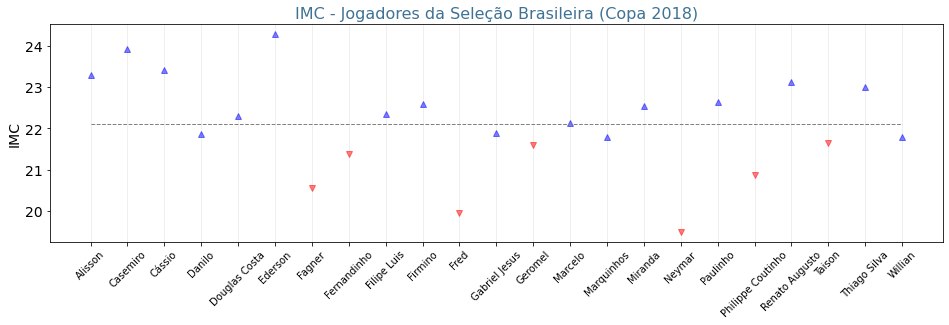

In [2]:
lu = np.load('../data/copa2018.npy',allow_pickle=True)
jogador = lu[:,0]
massa = lu[:,1]
altura = lu[:,2]
idade = lu[:,3]

imc = massa/altura**2 # IMC

g1 = np.where(imc < 21.7,True,False) # grupo 1
g2 = g1 == False # grupo 2

# PLOT
plt.figure(figsize=(16,4))
plt.plot(jogador,imc,lw=0)
plt.plot(jogador[g1],imc[g1],'vr',alpha=0.5)
plt.plot(jogador[g2],imc[g2],'^b',alpha=0.5)
plt.plot(jogador,np.ones(np.shape(imc))*np.mean(imc),'--',lw=1,c=[0.5,0.5,0.5])
plt.xticks(rotation=45);
plt.ylabel('IMC',fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.title('IMC - Jogadores da Seleção Brasileira (Copa 2018)',c='#407294',fontsize=16)
plt.grid(axis='x',alpha=0.25)
#plt.savefig('IMC.png')

**Problema 2**: A _Taxa Metabólica Basal_ (TMB) é a quantidade mínima de energia que o ser humano, em repouso, precisa para sobreviver. A *Equação de Mifflin - St. Jeor* para calcular a TMB em kcal/dia (quilocalorias por dia) de pessoas do sexo masculino é dada por: 

$$TMB = 10M + 6.25A - 5I + 5,$$

onde $M$ é a massa do indivíduo, $A$ sua altura e $I$ sua idade. 

[[Fonte: Wiikipedia]](https://en.wikipedia.org/wiki/Basal_metabolic_rate)

Usando a equação de Mifflin - St. Jeor: 

- calcule a energia necessária total para a manutenção vital de todos os jogadores da seleção de 2018 durante um ano inteiro, isto é, a TMB anual. Considere 1 ano = 365 dias.
- calcule a TMB anual do time inteiro para o quinquenio 2020 - 2024. Assuma o início do período em 1 de janeiro de 2020 e que nenhuma alteração na escalação do time ocorrerá no período.
- plote um gráfico em que o eixo `x` deve corresponder ao quinquênio e o eixo `y` ao total da TMB para todos os jogadores em cada ano. Use marcadores do tipo `'o'`.
- qual é o valor total em kcal no final de 2024? 

**Obs:** Note que a idade dos jogadores se altera com o tempo. Isto é, após o quinquênio estarão 5 anos mais velhos e a TMB para cada um será diferente a cada ano.

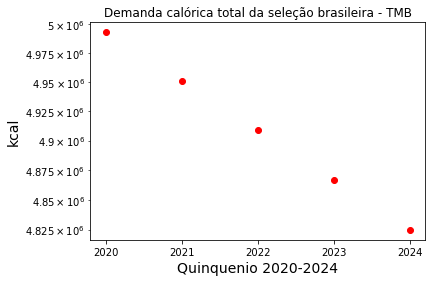

In [3]:
# Eq. Mifflin - St. Jeor
mifflin = lambda M,A,I: 10*M + 6.25*A - 5*I + 5 # kcal / dia 

TMB_jogadores = mifflin(massa,altura,idade)

# energia necessária nos próximos 5 anos

TMB = {}
for i in range(5):
    TMB[2020+i] = np.sum(365*mifflin(massa,altura,idade+i)) # kcal necessárias por ano para o time
    
for i in TMB.keys():    
    plt.semilogy(i,TMB[i],'ro-')
    plt.xlabel('Quinquenio 2020-2024',fontsize=14);
    plt.ylabel('kcal',fontsize=14);
    plt.xticks(np.arange(2020,2025));
    plt.title('Demanda calórica total da seleção brasileira - TMB');

**Problema 3:** O movimento executado por uma bola de futebol ao ser chutada a partir do campo por um jogador é similar ao movimento parabólico de um projétil. A velocidade da bola $V_b$ pode ser calculada pela expressão:

$$V_b = V_p\left( \dfrac{M_p}{M_p + M_b} \right)(1 + e),$$

onde $V_p$ é a velocidade da perna do chutador, $M_p$ é a massa da perna do chutador, $M_b$ é a massa da bola e $e$ é o *coeficiente de restituição* da bola. 

O alcance $a$ é a medida horizontal máxima que a bola atinge a partir do ponto de lançamento de acordo com um certo ângulo em que é lançada. Como conhecemos da Física Básica, a fórmula para o alcance é dada por: 

$$a = \dfrac{V_b^2\textrm{sen}(2\alpha)}{g}$$

Diante disso, considere os seguintes dados: 

- A massa da bola de futebol profissional é de 400 gramas e seu coeficiente de restituição é 0.7.
- A massa da perna de um jogador equivale a 10% de sua massa.
- A velocidade da perna de um jogador é de 20 m/s.
- A constante gravitacional equivale a 9.8 m/s<sup>2</sup>.

Assuma que um campo de futebol profissional "padrão FIFA" possui área de 100 x 68 <sup>2</sup>. Além disso, defina um *Whole-Field Kicker* (WFK) o jogador que, chutando uma bola a um ângulo de 45 graus, consegue transportá-la de gol a gol, ou seja de uma linha de fundo a outra, e como *Not Whole-Field Kicker* (not WFK) aquele que não consegue realizar esta proeza.

Usando os dados disponíveis na tabela dos jogadores da seleção de 2018:

- determine os jogadores que são "WFK" e os "not WFK", bem como a quantidade de jogadores em cada classe.
- determine quem é o WFK do time que chuta mais longe.
- determine qual é o menor alcance entre os chutes.
- plote um gráfico do tipo jogador x alcance, colorindo os "not WFK" com marcadores com borda vermelha e cor de face branca.

[[Fonte: Physics of Kicking a Soccer Ball]](http://www.mathematicshed.com/uploads/1/2/5/7/12572836/physicsofkickingsoccerball.pdf)

['Alisson' 'Casemiro' 'Cássio' 'Ederson' 'Geromel' 'Miranda' 'Paulinho'
 'Renato Augusto' 'Thiago Silva']


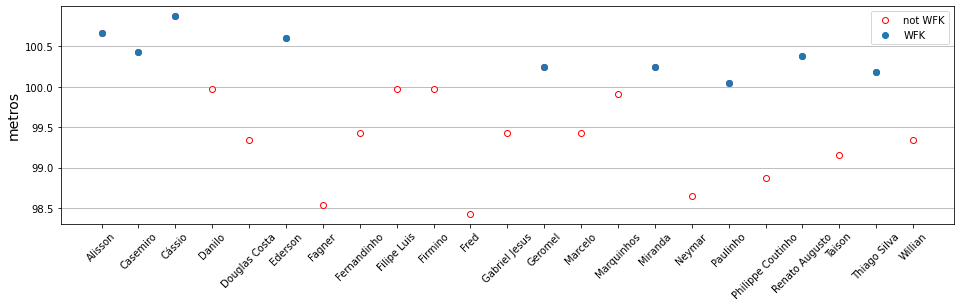

In [4]:
# vp: velocidade da perna do jogador (fixa: 20 m/s)
# mp: massa da perna do jogador (10% da massa do jogador)
# e: coeficiente de restituição da bola (média da bola oficial: 0.7)
# mb: massa da bola de futebol oficial (mb = 0.4 kg)
# alpha: angulo de lançamento da bola (chute)
# g: constante gravitacional (9.8 m/s2)

# velocidade da bola em m/s
vb = lambda vp,mp,mb,e: vp*(mp/(mp + mb))*(1 + e)

# formula do alcance: movimento projetil
alcance = lambda vb, alpha, g: vb**2*np.sin(2*alpha)/g

# Considere o campo FIFA: 100 m x 68 m

e = 0.7
vp = 20.0
mb = 0.4
g = 9.8
alpha = 45

MP = 0.2*massa # massas perna
VB = vb(vp,MP,mb,e) # vels bola
ALC = alcance(VB,alpha,g)

# quais jogadores conseguem um 'chute de campo inteiro'
kicker = ALC >= 100

plt.figure(figsize=(16,4))
plt.plot(jogador,ALC,'ro',mfc='w')
plt.plot(jogador[kicker],ALC[kicker],'o')
plt.xticks(rotation=45);
plt.ylabel('metros',fontsize=14);
plt.legend(['not WFK','WFK']); # Whole-Field Kicker
plt.grid(axis='y');

# maior, menor alcance
maior = np.max(ALC)
menor = np.min(ALC)
maior,menor
print(jogador[kicker])

**Problema 4:** Em 1835, o astrônomo James Inman desenvolveu a _fórmula de Haversine_. A fórmula de haversine (ou _de haverseno_) é uma equação usada em navegação para fornecer distâncias entre dois pontos de uma esfera a partir de suas latitudes e longitudes. É um caso especial de uma fórmula mais geral de trigonometria esférica, a _lei dos haversines_, que relaciona os lados e ângulos de um triângulo contido em uma superfície esférica.

A distância mais curta $d$ entre dois pontos sobre uma esfera de raio $R$ cujas latitudes são $(\phi_1,\phi_2)$ e longitudes $(\theta_1,\theta_2)$ é dada por:

$$d = 2R \, \textrm{arcsen}\big(\sqrt{ \textrm{hav}(\phi_2 - \phi_1) + \cos(\phi_1)\cos(\phi_2)\textrm{hav}(\theta_2 - \theta_1) } \big),$$

onde $\textrm{hav}(\alpha) = \textrm{sen}^2\big(\frac{\alpha}{2}\big)$ é a função haverseno de um ângulo $\alpha$.


A tabela abaixo lista os 5 aeroportos mais movimentados do mundo em 2014, com latitudes e longitudes dadas em graus.

|IATA| Aeroporto|$\phi$|$\theta$
|---|---|---|---|
|FRA|Frankfurt|50.026|8.543|
|DEN|Denver International|39.862|-104.673|
|BKK|Suvarnabhumi|13.681|100.747|
|SYD|Sydney Kingsford-Smith|-33.946|151.177|
|GRU|Guarulhos|-23.432|-46.47|

Tarefas:

- Escreva uma função para calcular a distância mais curta em quilômetros entre dois pontos quaisquer sobre a superfície da Terra (considere $R = 6378.1$ km) dadas as suas latitudes e longitudes. 
- Use esta função para calcular as distâncias dois-a-dois para todos os aeroportos da tabela acima dadas não só as latitudes e longitudes, mas também os seus códigos IATA.
- Construa uma matriz numérica $M$ de correlação de distâncias _estritamente triangular inferior_ com base na ordem alfabética do código IATA. Note que uma matriz estritamente triangular inferior é possui zeros em todas as posições $M_{ij}$, exceto quando $i > j$. Logo, não é necessário computar duas vezes um mesmo trajeto, por exemplo, a distância de FRA a DEN será a mesma de DEN a FRA. (Vide exemplo de uma matriz de distâncias [aqui](https://www.researchgate.net/figure/Figura-2-Matriz-de-distancias_fig3_322896495))
- Determine $i$ e $j$ tais que $M_{ij}$ é máxima, bem como o valor de $M_{ij}$.

In [5]:
IATA = {    
    'BKK': (13.681,100.747),
    'DEN': (39.862,104.673),
    'FRA': (50.026,8.543),
    'GRU': (-23.432,-46.47),
    'SYD': (-33.946,151.177),
}

# haversine
def hav(x):
    return np.sin(x/2)**2
    
# (lat,long)    
def latlong(iata):    
    return (IATA[iata][0],IATA[iata][1])
    
# distance    
def d(lat1,long1,lat2,long2):
    R = 6378.1    
    d = 2*R*np.arcsin(np.sqrt(hav(lat2 - lat1) + np.cos(lat1)*np.cos(lat2)*hav(long2 -long1)))
    return d

MD = np.zeros((len(IATA),len(IATA)))
for c,k in enumerate(IATA.keys()):
    for e,j in enumerate(IATA.keys()):
        if c > e:            
            lat1,long1 = latlong(k)
            lat2,long2 = latlong(j)
            MD[c,e] = np.round(d(lat1,long1,lat2,long2),2)
                    
mi,mj = np.where(MD == np.max(MD))
print(mi,mj,MD[mi,mj])

[4] [0] [16764.66]
